In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
new_df = df.set_index('PassengerId')

In [7]:
new_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
num_female = (new_df['Sex'] == 'female').sum()
num_male = (new_df['Sex'] == 'male').sum()
print(f"Number of female passenger: {num_female}")
print(f"Number of male passenger: {num_male}")

Number of female passenger: 314
Number of male passenger: 577


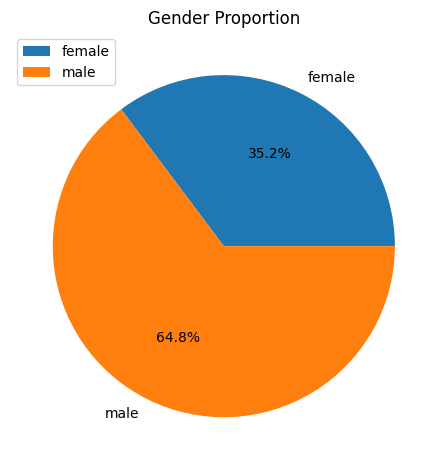

In [15]:
proportion = [num_female, num_male]
plt.pie(proportion, labels = ["female", "male"], autopct='%1.1f%%')
plt.title("Gender Proportion")
plt.tight_layout()
plt.legend(loc=2)
plt.show()

In [17]:
sns.set_style("darkgrid")

(-5.0, 85.0)

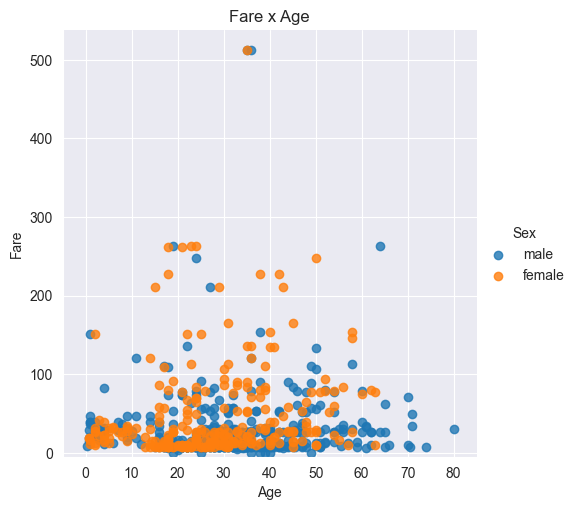

In [21]:
lm= sns.lmplot(x='Age', y='Fare', data=df, hue='Sex', fit_reg=False)
# set title
lm.set(title = 'Fare x Age')

# get the axes object and tweak it
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

In [22]:
survived_df = new_df[new_df['Survived']==1]

In [24]:
num_female_sur = (survived_df['Sex'] == 'female').sum()
num_male_sur = (survived_df['Sex'] == 'male').sum()
print(f"Number of female passenger: {num_female_sur}")
print(f"Number of male passenger: {num_male_sur}")

Number of female passenger: 233
Number of male passenger: 109


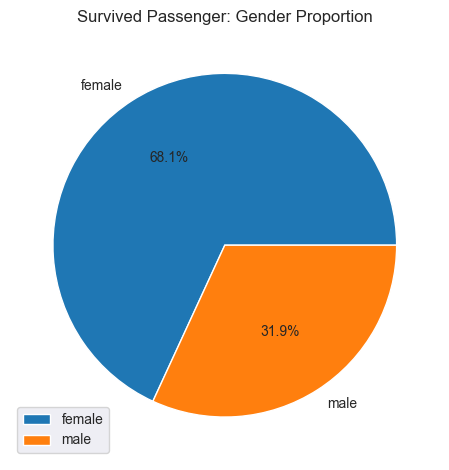

In [32]:
proportion = [num_female_sur, num_male_sur]
plt.pie(proportion, labels = ["female", "male"], autopct='%1.1f%%')
plt.title("Survived Passenger: Gender Proportion")
plt.tight_layout()
plt.legend(loc=3)
plt.show()

In [27]:
def plot_age(input_df, sex, survived, title):
    input_df = input_df[input_df['Sex'] == sex]
    input_df = input_df[input_df['Survived'] == survived]
    plot_df = input_df.Age.sort_values(ascending = False)
    binsVal = np.arange(0, 100, 10)
    plt.hist(plot_df, bins=binsVal)
    plt.xlabel('Age')
    plt.ylabel('Number of Passenger')
    plt.title(title)
    plt.show()

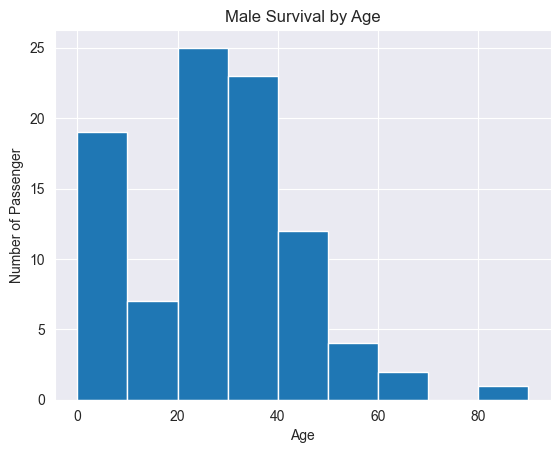

In [28]:
plot_age(new_df, "male", 1, "Male Survival by Age")

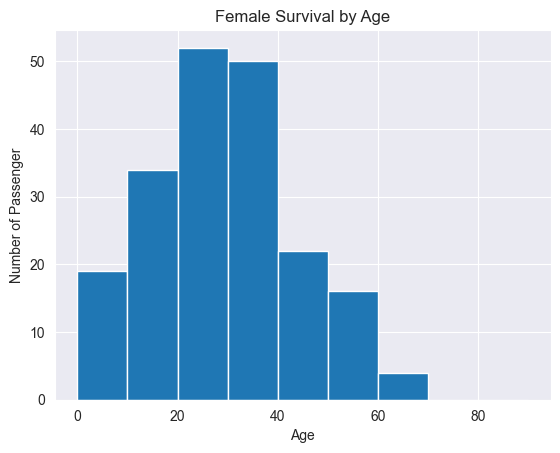

In [29]:
plot_age(new_df, "female", 1, "Female Survival by Age")

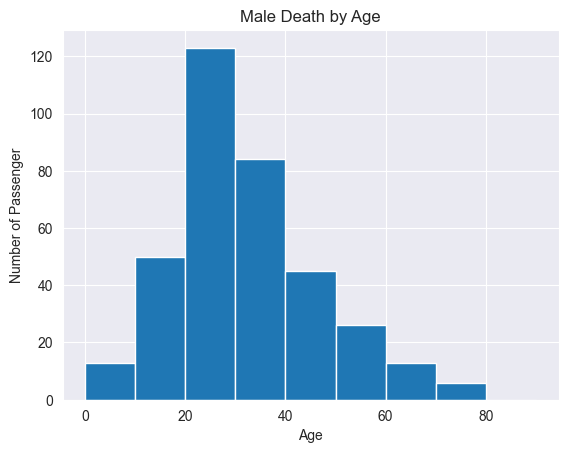

In [30]:
plot_age(new_df, "male", 0, "Male Death by Age")

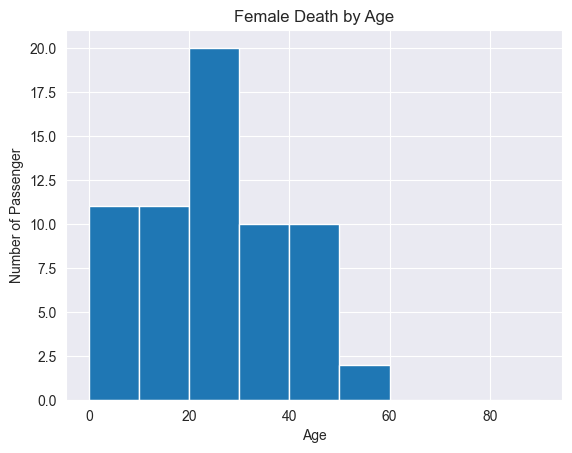

In [31]:
plot_age(new_df, "female", 0, "Female Death by Age")